<a href="https://colab.research.google.com/github/murilomarsoli/diabetes-dataset-transform-powerBI/blob/main/DiabetesDatasetTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/DIO/DiabetesAnalysis/diabetes.csv")

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Informações gerais do dataset

df.info()
df.shape # dimensão do dataset -> (768 linhas, 9 colunas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

<Axes: >

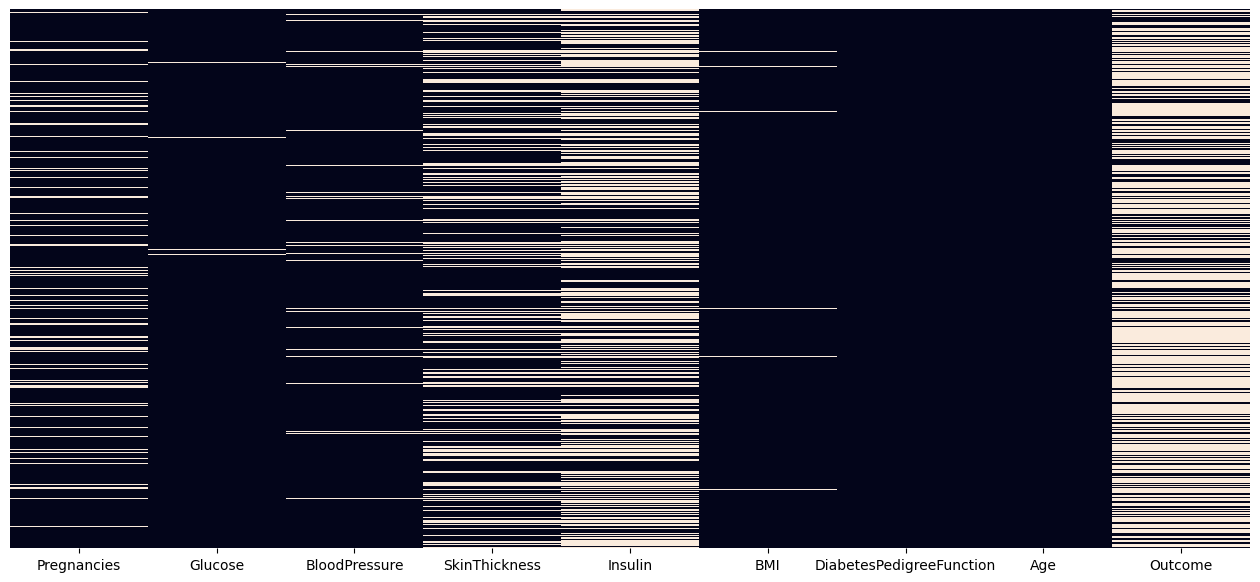

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
# Quantidade de valores iguais a '0' agrupados por coluna

df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Registros que possuem valor '0' na coluna "Glucose" (Coluna que não pode ter 0 em glucose)

'''
3 dos 5 registros possuem "Age" de 21 e 22 (pegar a média do somatório de "Glucose" das pessoas de
21 e 22 anos que tem valores diferentes de '0' na "Glucose" e preencher esses 3 valores iguais a '0' com essa média)

'''

df[df["Glucose"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
# Consultando registros com a "Glucose" diferente de 0

df[df["Glucose"] != 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Criação de um subconjunto de dados apenas com os registros de pessoas com valores diferentes de zero na coluna "Glucose"

glucose_t = df[df["Glucose"] != 0]

In [ ]:
# Média de "Glucose" de todo o dataset

df["Glucose"].mean()

120.89453125

In [ ]:
# Média de "Glucose" apenas com os valores de "Glucose" diferentes de zero

glucose_t["Glucose"].mean()

121.6867627785059

In [ ]:
# Subconjunto das pessoas de 21 a 31 anos de idade que não possuem valores zerados na coluna "BloodPressure" e assim por diante...

glucose_t_21_31 = df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["Glucose"] != 0)] # 21 - 31

In [ ]:
glucose_t_31_41 = df[((df["Age"] > 31) & (df["Age"] <= 41)) & (df["Glucose"] != 0)] # 31 - 41

In [ ]:
glucose_t_41_51 = df[((df["Age"] > 41) & (df["Age"] <= 51)) & (df["Glucose"] != 0)] # 41 - 51

In [ ]:
glucose_t_51_61 = df[((df["Age"] > 51) & (df["Age"] <= 61)) & (df["Glucose"] != 0)] # 51 - 61

In [ ]:
glucose_t_61_71 = df[((df["Age"] > 61) & (df["Age"] <= 71)) & (df["Glucose"] != 0)] # 61 - 71

In [ ]:
glucose_t_71_81 = df[((df["Age"] > 71) & (df["Age"] <= 81)) & (df["Glucose"] != 0)] # 71 - 81

In [ ]:
def alterar_glucose(colunas):
  Glucose = colunas[0]
  Age = colunas[1]
  if ((Age > 20) & (Age <= 31)) & (Glucose == 0):
    return round(glucose_t_21_31["Glucose"].mean())
  elif ((Age > 31) & (Age <= 41)) & (Glucose == 0):
    return round(glucose_t_31_41["Glucose"].mean())
  elif ((Age > 41) & (Age <= 51)) & (Glucose == 0):
    return round(glucose_t_41_51["Glucose"].mean())
  elif ((Age > 51) & (Age <= 61)) & (Glucose == 0):
    return round(glucose_t_51_61["Glucose"].mean())
  elif ((Age > 61) & (Age <= 71)) & (Glucose == 0):
    return round(glucose_t_61_71["Glucose"].mean())
  elif ((Age > 71) & (Age <= 81)) & (Glucose == 0):
    return round(glucose_t_71_81["Glucose"].mean())
  else:
    return Glucose

In [ ]:
# Aplicando a função para alterar o valor de "Glucose" das pessoas que estão com os valores de "Glucose" igual a zero

df["Glucose"] = df[["Glucose", "Age"]].apply(alterar_glucose, axis=1)

In [ ]:
# Verificando se a atualização dos valores da coluna "Glucose" foi realizada com sucesso (baseada na dezena de idade 21-31)

print(round(glucose_t_21_31["Glucose"].mean()))

df[df["Glucose"] == round(glucose_t_21_31["Glucose"].mean())]

116


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
75,1,116,48,20,0,24.7,0.140,22,0
182,1,116,74,20,23,27.7,0.299,21,0
342,1,116,68,35,0,32.0,0.389,22,0
347,3,116,0,0,0,23.5,0.187,23,0
386,5,116,74,29,0,32.3,0.660,35,1
393,4,116,72,12,87,22.1,0.463,37,0
527,3,116,74,15,105,26.3,0.107,24,0
550,1,116,70,28,0,27.4,0.204,21,0
726,1,116,78,29,180,36.1,0.496,25,0


<Axes: >

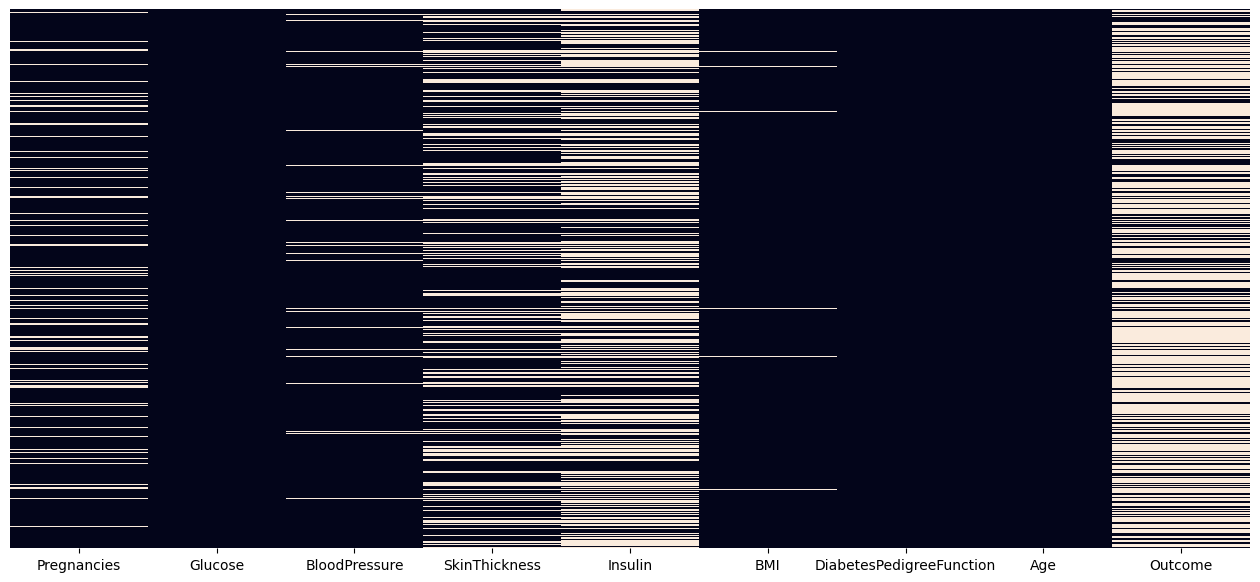

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
df[df == 0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Subconjunto de dados das pessoas que possuem o "Blood Pressure" diferente de zero

blood_pressure_t = df[df["BloodPressure"] != 0]

In [ ]:
# Consulta de blood_pressure_t ordenada  por idade (Age)

blood_pressure_t.sort_values(by="Age")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
571,2,130,96,0,0,22.6,0.268,21,0
525,3,87,60,18,0,21.8,0.444,21,0
671,1,99,58,10,0,25.4,0.551,21,0
526,1,97,64,19,82,18.2,0.299,21,0
414,0,138,60,35,167,34.6,0.534,21,1
...,...,...,...,...,...,...,...,...,...
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0
123,5,132,80,0,0,26.8,0.186,69,0
666,4,145,82,18,0,32.5,0.235,70,1


In [ ]:
blood_pressure_t["Age"].min()

21

In [ ]:
blood_pressure_t["Age"].max()

81

In [ ]:
# Preencher os valores zerados do "BloodPressure" com a média do "BloodPressure" das pessoas de cada dezena de idade (dos 21 aos 31, dos 31 aos 41, dos 41 aos 51... dos 71 aos 81)

df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["BloodPressure"] != 0)] # 21 - 31

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
760,2,88,58,26,16,28.4,0.766,22,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
# Subconjunto das pessoas de 21 a 31 anos de idade que não possuem valores zerados na coluna "BloodPressure" e assim por diante...

blood_pressure_t_21_31 = df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["BloodPressure"] != 0)] # 21 - 31

In [ ]:
blood_pressure_t_31_41 = df[((df["Age"] > 31) & (df["Age"] <= 41)) & (df["BloodPressure"] != 0)] # 31 - 41

In [ ]:
blood_pressure_t_41_51 = df[((df["Age"] > 41) & (df["Age"] <= 51)) & (df["BloodPressure"] != 0)] # 41 - 51

In [ ]:
blood_pressure_t_51_61 = df[((df["Age"] > 51) & (df["Age"] <= 61)) & (df["BloodPressure"] != 0)] # 51 - 61

In [ ]:
blood_pressure_t_61_71 = df[((df["Age"] > 61) & (df["Age"] <= 71)) & (df["BloodPressure"] != 0)] # 61 - 71

In [ ]:
blood_pressure_t_71_81 = df[((df["Age"] > 71) & (df["Age"] <= 81)) & (df["BloodPressure"] != 0)] # 71 - 81

In [ ]:
# Função para alterar o valor de "BloodPressure" das pessoas que estão com os valores de "BloodPressure" igual a zero (com a média ARREDONDADA e baseada na idade de dezena por dezena)

def alterar_blood_pressure(colunas):
  BloodPressure = colunas[0]
  Age = colunas[1]
  if ((Age > 20) & (Age <= 31)) & (BloodPressure == 0):
    return round(blood_pressure_t_21_31["BloodPressure"].mean())
  elif ((Age > 31) & (Age <= 41)) & (BloodPressure == 0):
    return round(blood_pressure_t_31_41["BloodPressure"].mean())
  elif ((Age > 41) & (Age <= 51)) & (BloodPressure == 0):
    return round(blood_pressure_t_41_51["BloodPressure"].mean())
  elif ((Age > 51) & (Age <= 61)) & (BloodPressure == 0):
    return round(blood_pressure_t_51_61["BloodPressure"].mean())
  elif ((Age > 61) & (Age <= 71)) & (BloodPressure == 0):
    return round(blood_pressure_t_61_71["BloodPressure"].mean())
  elif ((Age > 71) & (Age <= 81)) & (BloodPressure == 0):
    return round(blood_pressure_t_71_81["BloodPressure"].mean())
  else:
    return BloodPressure

In [ ]:
# Aplicando a função para alterar o valor de "BloodPressure" das pessoas que estão com os valores de "BloodPressure" igual a zero

df["BloodPressure"] = df[["BloodPressure", "Age"]].apply(alterar_blood_pressure, axis=1)

In [ ]:
# Verificando se a atualização dos valores da coluna "BloodPressure" foi realizada com sucesso (baseada na dezena de idade 21-31)

print(round(blood_pressure_t_21_31["BloodPressure"].mean()))

df[df["BloodPressure"] == round(blood_pressure_t_21_31["BloodPressure"].mean())]

69


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,69,0,0,35.3,0.134,29,0
49,7,105,69,0,0,0.0,0.305,24,0
60,2,84,69,0,0,0.0,0.304,21,0
78,0,131,69,0,0,43.2,0.270,26,1
81,2,74,69,0,0,0.0,0.102,22,0
172,2,87,69,23,0,28.9,0.773,25,0
261,3,141,69,0,0,30.0,0.761,27,1
266,0,138,69,0,0,36.3,0.933,25,1
269,2,146,69,0,0,27.5,0.240,28,1
300,0,167,69,0,0,32.3,0.839,30,1


<Axes: >

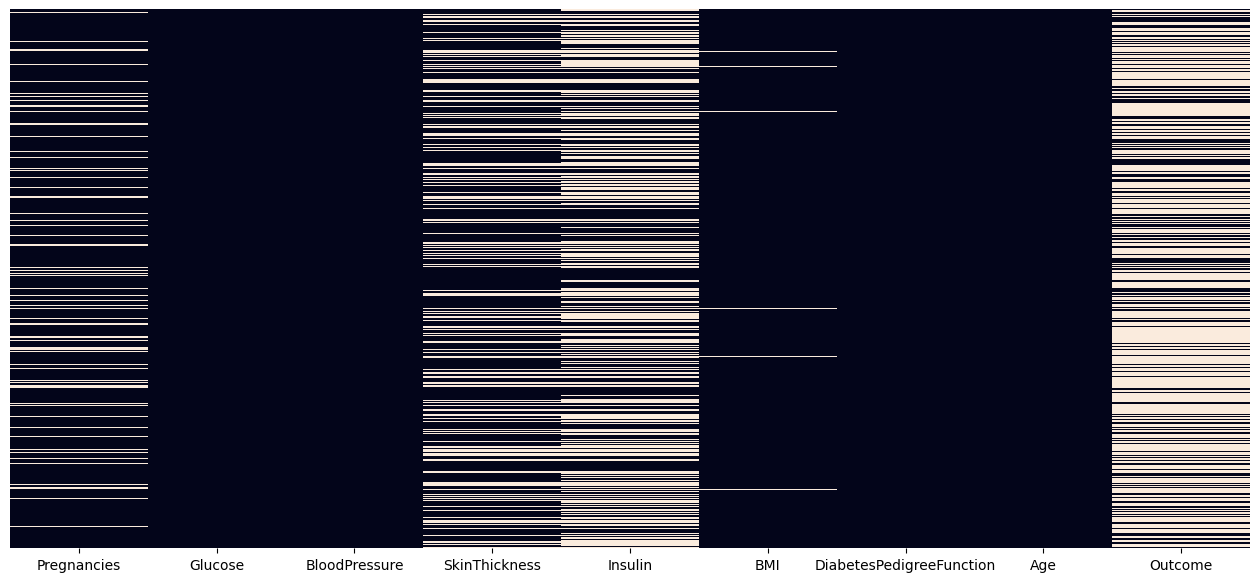

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
df[df["SkinThickness"] != 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
# Subconjunto de dados das pessoas que possuem o "Blood Pressure" diferente de zero

skin_thickness_t = df[df["SkinThickness"] != 0]

In [ ]:
# Subconjunto das pessoas de 21 a 31 anos de idade que não possuem valores zerados na coluna "SkinThickness" e assim por diante...

skin_thickness_t_21_31 = df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["SkinThickness"] != 0)] # 21 - 31

In [ ]:
skin_thickness_t_31_41 = df[((df["Age"] > 31) & (df["Age"] <= 41)) & (df["SkinThickness"] != 0)] # 31 - 41

In [ ]:
skin_thickness_t_41_51 = df[((df["Age"] > 41) & (df["Age"] <= 51)) & (df["SkinThickness"] != 0)] # 41 - 51

In [ ]:
skin_thickness_t_51_61 = df[((df["Age"] > 51) & (df["Age"] <= 61)) & (df["SkinThickness"] != 0)] # 51 - 61

In [ ]:
skin_thickness_t_61_71 = df[((df["Age"] > 61) & (df["Age"] <= 71)) & (df["SkinThickness"] != 0)] # 61 - 71

In [ ]:
skin_thickness_t_71_81 = df[((df["Age"] > 71) & (df["Age"] <= 81)) & (df["SkinThickness"] != 0)] # 71 - 81

In [ ]:
# Função para alterar o valor de "BloodPressure" das pessoas que estão com os valores de "BloodPressure" igual a zero (com a média ARREDONDADA e baseada na idade de dezena por dezena)

def alterar_skin_thickness(colunas):
  SkinThickness = colunas[0]
  Age = colunas[1]
  if ((Age > 20) & (Age <= 31)) & (SkinThickness == 0):
    return round(skin_thickness_t_21_31["SkinThickness"].mean())
  elif ((Age > 31) & (Age <= 41)) & (SkinThickness == 0):
    return round(skin_thickness_t_31_41["SkinThickness"].mean())
  elif ((Age > 41) & (Age <= 51)) & (SkinThickness == 0):
    return round(skin_thickness_t_41_51["SkinThickness"].mean())
  elif ((Age > 51) & (Age <= 61)) & (SkinThickness == 0):
    return round(skin_thickness_t_51_61["SkinThickness"].mean())
  elif ((Age > 61) & (Age <= 71)) & (SkinThickness == 0):
    return round(skin_thickness_t_61_71["SkinThickness"].mean())
  elif ((Age > 71) & (Age <= 81)) & (SkinThickness == 0):
    return round(skin_thickness_t_71_81["SkinThickness"].mean())
  else:
    return SkinThickness

In [ ]:
# Aplicando a função para alterar o valor de "SkinThickness" das pessoas que estão com os valores de "SkinThickness" igual a zero

df["SkinThickness"] = df[["SkinThickness", "Age"]].apply(alterar_skin_thickness, axis=1)

In [ ]:
# Verificando se a atualização dos valores da coluna "SkinThickness" foi realizada com sucesso (baseada na dezena de idade 21-31)

print(round(skin_thickness_t_21_31["SkinThickness"].mean()))

df[df["SkinThickness"] == round(skin_thickness_t_21_31["SkinThickness"].mean())]

28


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,28,0,25.6,0.201,30,0
7,10,115,69,28,0,35.3,0.134,29,0
10,4,110,92,28,0,37.6,0.191,30,0
17,7,107,74,28,0,29.6,0.254,31,1
33,6,92,92,28,0,19.9,0.188,28,0
...,...,...,...,...,...,...,...,...,...
728,2,175,88,28,0,22.9,0.326,22,0
729,2,92,52,28,0,30.1,0.141,22,0
731,8,120,86,28,0,28.4,0.259,22,1
750,4,136,70,28,0,31.2,1.182,22,1


<Axes: >

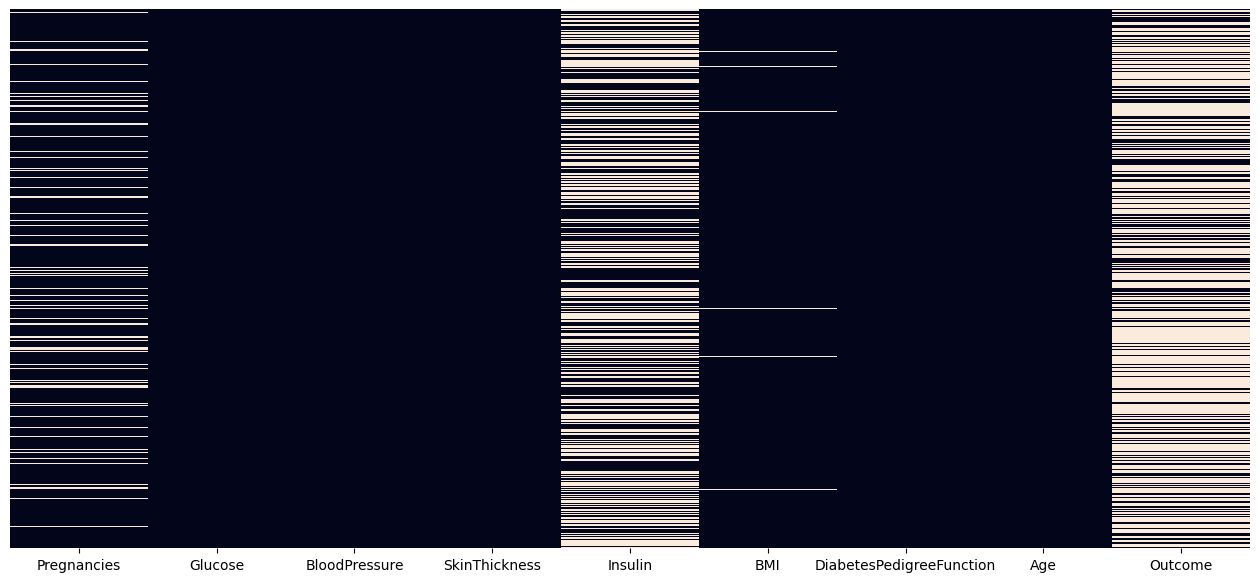

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
df[df["Insulin"] != 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [ ]:
insulin_t = df[df["Insulin"] != 0]

In [ ]:
# Subconjunto das pessoas de 21 a 31 anos de idade que não possuem valores zerados na coluna "Insulin" e assim por diante...

insulin_t_21_31 = df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["Insulin"] != 0)] # 21 - 31

In [ ]:
insulin_t_31_41 = df[((df["Age"] > 31) & (df["Age"] <= 41)) & (df["Insulin"] != 0)] # 31 - 41

In [ ]:
insulin_t_41_51 = df[((df["Age"] > 41) & (df["Age"] <= 51)) & (df["Insulin"] != 0)] # 41 - 51

In [ ]:
insulin_t_51_61 = df[((df["Age"] > 51) & (df["Age"] <= 61)) & (df["Insulin"] != 0)] # 51 - 61

In [ ]:
insulin_t_61_71 = df[((df["Age"] > 61) & (df["Age"] <= 71)) & (df["Insulin"] != 0)] # 61 - 71

In [ ]:
insulin_t_71_81 = df[((df["Age"] > 71) & (df["Age"] <= 81)) & (df["Insulin"] != 0)] # 71 - 81

In [ ]:
# Função para alterar o valor de "Insulin" das pessoas que estão com os valores de "Insulin" igual a zero (com a média ARREDONDADA e baseada na idade de dezena por dezena)

def alterar_insulin(colunas):
  Insulin = colunas[0]
  Age = colunas[1]
  if ((Age > 20) & (Age <= 31)) & (Insulin == 0):
    return round(insulin_t_21_31["Insulin"].mean())
  elif ((Age > 31) & (Age <= 41)) & (Insulin == 0):
    return round(insulin_t_31_41["Insulin"].mean())
  elif ((Age > 41) & (Age <= 51)) & (Insulin == 0):
    return round(insulin_t_41_51["Insulin"].mean())
  elif ((Age > 51) & (Age <= 61)) & (Insulin == 0):
    return round(insulin_t_51_61["Insulin"].mean())
  elif ((Age > 61) & (Age <= 71)) & (Insulin == 0):
    return round(insulin_t_61_71["Insulin"].mean())
  elif ((Age > 71) & (Age <= 81)) & (Insulin == 0):
    return round(insulin_t_71_81["Insulin"].mean())
  else:
    return Insulin

In [ ]:
# Aplicando a função para alterar o valor de "Insulin" das pessoas que estão com os valores de "Insulin" igual a zero

df["Insulin"] = df[["Insulin", "Age"]].apply(alterar_insulin, axis=1)

In [ ]:
# Verificando se a atualização dos valores da coluna "Insulin" foi realizada com sucesso (baseada na dezena de idade 21-31)

print(round(insulin_t_21_31["Insulin"].mean()))

df[df["Insulin"] == round(insulin_t_21_31["Insulin"].mean())]

144


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,144,26.6,0.351,31,0
5,5,116,74,28,144,25.6,0.201,30,0
7,10,115,69,28,144,35.3,0.134,29,0
10,4,110,92,28,144,37.6,0.191,30,0
17,7,107,74,28,144,29.6,0.254,31,1
...,...,...,...,...,...,...,...,...,...
750,4,136,70,28,144,31.2,1.182,22,1
752,3,108,62,24,144,26.0,0.223,25,0
758,1,106,76,28,144,37.5,0.197,26,0
764,2,122,70,27,144,36.8,0.340,27,0


<Axes: >

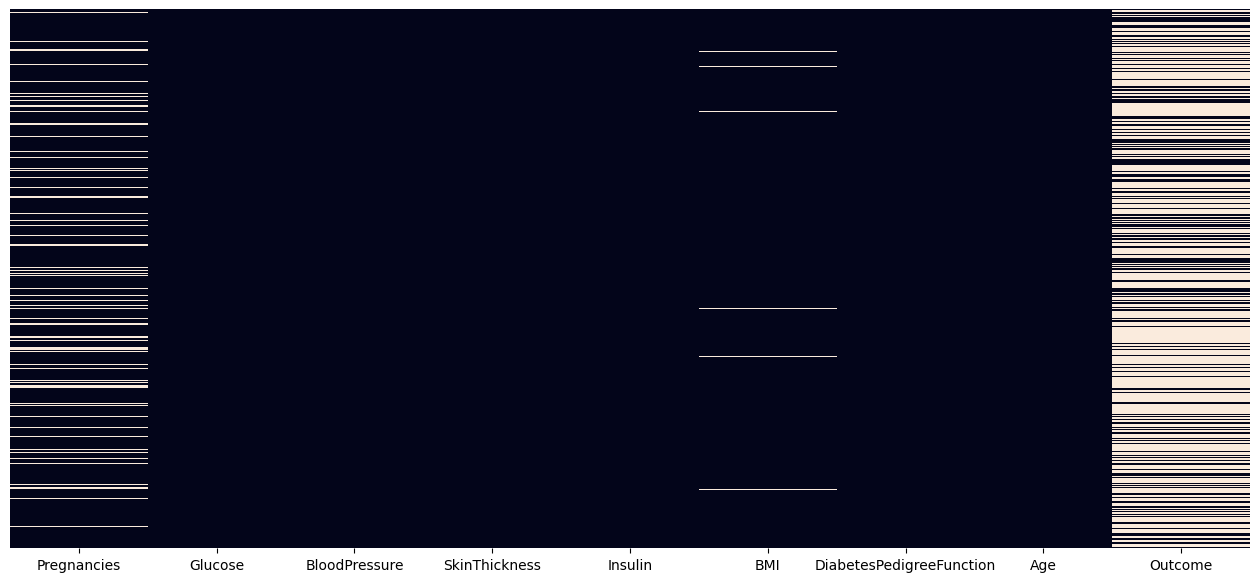

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
df[df["BMI"] != 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,163,33.6,0.627,50,1
1,1,85,66,29,144,26.6,0.351,31,0
2,8,183,64,31,153,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,144,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,31,163,30.1,0.349,47,1


In [ ]:
bmi_t = df[df["BMI"] != 0]

In [ ]:
# Subconjunto das pessoas de 21 a 31 anos de idade que não possuem valores zerados na coluna "BMI" e assim por diante...

bmi_t_21_31 = df[((df["Age"] > 20) & (df["Age"] <= 31)) & (df["BMI"] != 0)] # 21 - 31

In [ ]:
bmi_t_31_41 = df[((df["Age"] > 31) & (df["Age"] <= 41)) & (df["BMI"] != 0)] # 31 - 41

In [ ]:
bmi_t_41_51 = df[((df["Age"] > 41) & (df["Age"] <= 51)) & (df["BMI"] != 0)] # 41 - 51

In [ ]:
bmi_t_51_61 = df[((df["Age"] > 51) & (df["Age"] <= 61)) & (df["BMI"] != 0)] # 51 - 61

In [ ]:
bmi_t_61_71 = df[((df["Age"] > 61) & (df["Age"] <= 71)) & (df["BMI"] != 0)] # 61 - 71

In [ ]:
bmi_t_71_81 = df[((df["Age"] > 71) & (df["Age"] <= 81)) & (df["BMI"] != 0)] # 71 - 81

In [ ]:
# Função para alterar o valor de "BMI" das pessoas que estão com os valores de "BMI" igual a zero (com a média ARREDONDADA e baseada na idade de dezena por dezena)

def alterar_bmi(colunas):
  Bmi = colunas[0]
  Age = colunas[1]
  if ((Age > 20) & (Age <= 31)) & (Bmi == 0):
    return round(bmi_t_21_31["BMI"].mean())
  elif ((Age > 31) & (Age <= 41)) & (Bmi == 0):
    return round(bmi_t_31_41["BMI"].mean())
  elif ((Age > 41) & (Age <= 51)) & (Bmi == 0):
    return round(bmi_t_41_51["BMI"].mean())
  elif ((Age > 51) & (Age <= 61)) & (Bmi == 0):
    return round(bmi_t_51_61["BMI"].mean())
  elif ((Age > 61) & (Age <= 71)) & (Bmi == 0):
    return round(bmi_t_61_71["BMI"].mean())
  elif ((Age > 71) & (Age <= 81)) & (Bmi == 0):
    return round(bmi_t_71_81["BMI"].mean())
  else:
    return Bmi

In [ ]:
# Aplicando a função para alterar o valor de "BMI" das pessoas que estão com os valores de "BMI" igual a zero

df["BMI"] = df[["BMI", "Age"]].apply(alterar_bmi, axis=1)

In [ ]:
# Verificando se a atualização dos valores da coluna "BMI" foi realizada com sucesso (baseada na dezena de idade 21-31)

print(round(bmi_t_21_31["BMI"].mean()))

df[df["BMI"] == round(bmi_t_21_31["BMI"].mean())]

32


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,69,28,144,32.0,0.305,24,0
60,2,84,69,28,144,32.0,0.304,21,0
74,1,79,75,30,144,32.0,0.396,22,0
81,2,74,69,28,144,32.0,0.102,22,0
91,4,123,80,15,176,32.0,0.443,34,0
145,0,102,75,23,144,32.0,0.572,21,0
187,1,128,98,41,58,32.0,1.321,33,1
264,4,123,62,31,153,32.0,0.226,35,1
342,1,116,68,35,144,32.0,0.389,22,0
371,0,118,64,23,89,32.0,1.731,21,0


<Axes: >

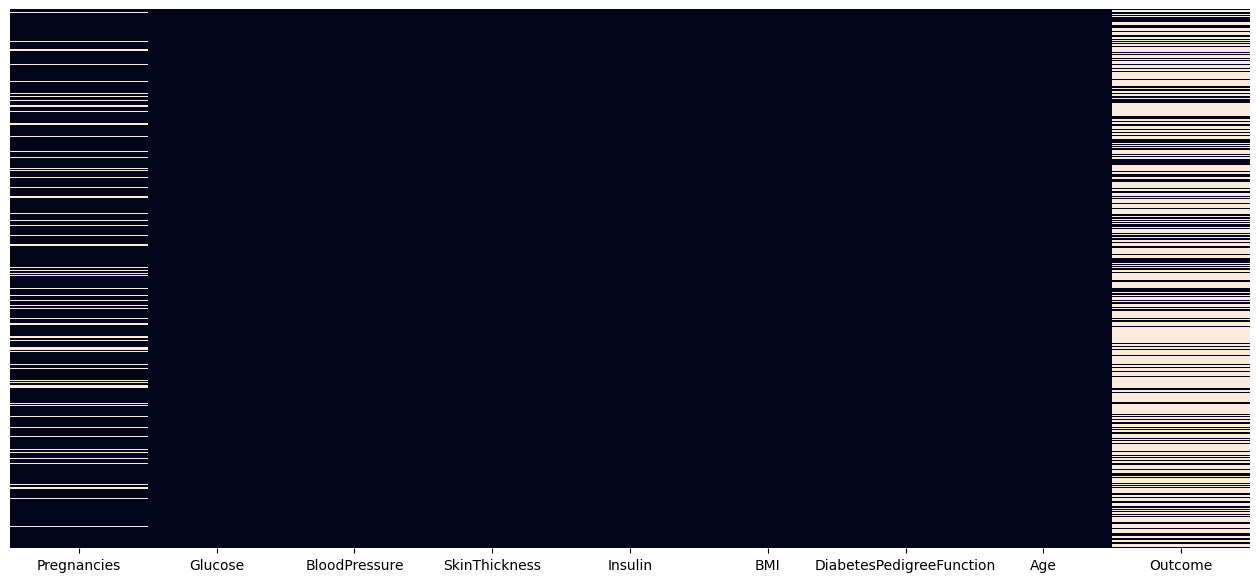

In [ ]:
# Valores do dataset que são iguais a '0'

plt.figure(figsize=(16, 7)) # redimensionamento da figura
sb.heatmap(df == 0, cmap="rocket", yticklabels=False, cbar=False) # mapa de calor

In [ ]:
df.to_csv("/content/drive/MyDrive/ColabNotebooks/DIO/diabetes_transformed.csv", index=False)